In [178]:
#READ FILE

#read csv file into 2-dimenson list

import pandas as pd
import numpy as np
from datetime import datetime
import time
from sklearn.cluster import KMeans
import seaborn as sb

filename1 = '/Users/soojinlee/repo/Capstone/Data/csv/CPU/cpu01_raw.csv'
filename2 ='/Users/soojinlee/repo/Capstone/Data/csv/CPU/cpu02_raw.csv'
filename3 ='/Users/soojinlee/repo/Capstone/Data/csv/CPU/cpu03_raw.csv'
filename4 ='/Users/soojinlee/repo/Capstone/Data/csv/CPU/cpu04_raw.csv'
filename5 ='/Users/soojinlee/repo/Capstone/Data/csv/CPU/cpu05_raw.csv'
filename6 ='/Users/soojinlee/repo/Capstone/Data/csv/CPU/cpu06_raw.csv'
filename7 ='/Users/soojinlee/repo/Capstone/Data/csv/CPU/cpu07_raw.csv'
filename8 ='/Users/soojinlee/repo/Capstone/Data/csv/CPU/cpu08_raw.csv'
filename9 ='/Users/soojinlee/repo/Capstone/Data/csv/CPU/cpu09_raw.csv'
filename10 ='/Users/soojinlee/repo/Capstone/Data/csv/CPU/cpu10_raw.csv'


file1 = pd.read_csv(filename1) #data frame
file2 = pd.read_csv(filename2)
file3 = pd.read_csv(filename3)
file4 = pd.read_csv(filename4)
file5 = pd.read_csv(filename5)
file6 = pd.read_csv(filename6)
file7 = pd.read_csv(filename7)
file8 = pd.read_csv(filename8)
file9 = pd.read_csv(filename9)
file10 = pd.read_csv(filename10)


#raw_list = data.values #list

raw_df=pd.concat([file1,file2])
#pd.concat([file1,file2,file3,file4,file5,file6,file7,file8])
test_df=pd.concat([file9,file10])
raw_df

,수신시간,사용율
0,2020-07-01 00:00:58,11
1,2020-07-01 00:00:28,2
2,2020-06-30 23:59:58,2
3,2020-06-30 23:59:28,2
4,2020-06-30 23:58:58,2
...,...,...
2858,2020-07-01 00:02:29,18
2859,2020-07-01 00:01:59,17
2860,2020-07-01 00:01:29,19
2861,2020-07-01 00:00:58,11


In [179]:
indexing1_df = raw_df.loc[::-1].reset_index(drop=True) #오름차순으로 순서 뒤집자

add_lst=[]
for i in range(len(indexing1_df.index)):
    add_lst.append(i)

indexing1_df["x"]=add_lst

print(indexing1_df)



                     수신시간  사용율     x
0     2020-07-01 00:00:28    2     0
1     2020-07-01 00:00:58   11     1
2     2020-07-01 00:01:29   19     2
3     2020-07-01 00:01:59   17     3
4     2020-07-01 00:02:29   18     4
...                   ...  ...   ...
5721  2020-06-30 23:58:58    2  5721
5722  2020-06-30 23:59:28    2  5722
5723  2020-06-30 23:59:58    2  5723
5724  2020-07-01 00:00:28    2  5724
5725  2020-07-01 00:00:58   11  5725

[5726 rows x 3 columns]


In [180]:
#수신시간이 30초 단위로 순서대로라서 index랑 역할 같아서 지워줌
#하지만 나중에 발생시간 표현할 때 써줄 것
indexing2_df = indexing1_df.drop(['수신시간'],axis =1) 
indexing3_df = indexing1_df.drop(['수신시간','x'],axis =1) 
indexing2_df= indexing2_df[['x','사용율']]
df=indexing2_df.rename({'x':'x','사용율':'Usage'},axis='columns')
df

,x,Usage
0,0,2
1,1,11
2,2,19
3,3,17
4,4,18
...,...,...
5721,5721,2
5722,5722,2
5723,5723,2
5724,5724,2


In [181]:
arr_1d=indexing3_df.values.ravel()
arr_gap=[]
for i in range(len(arr_1d)-1):
    arr_gap.append(abs(arr_1d[i+1]-arr_1d[i]))
#gap의 표준편차
stan_gap=np.std(arr_gap)
stan_gap

2.166985407116904

In [182]:
gap_df=pd.DataFrame(data=arr_gap,index=range(len(arr_gap)),columns=['gap'])

add_list=[]
for i in range(len(gap_df.index)):
    add_list.append(i)

gap_df["x"]=add_list
gap_df= gap_df[['x','gap']]
gap_df

arr_gap2=pd.DataFrame(columns=['x','gap'])
j=0
for i in range(len(gap_df)):
    if(gap_df['gap'][i]>stan_gap*2):
        arr_gap2.loc[j]=gap_df.loc[i]
        j+=1
        
arr_gap2

,x,gap
0,0,9
1,1,8
2,5,6
3,6,7
4,477,9
...,...,...
368,5252,9
369,5290,5
370,5453,6
371,5470,5


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


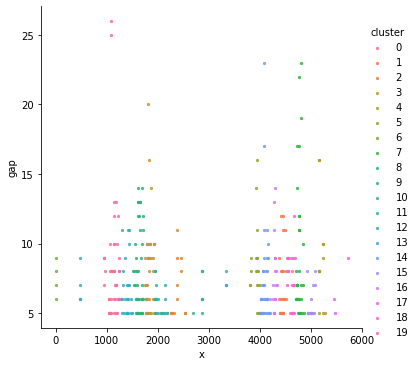

In [193]:
points_gap2 = arr_gap2.values
kmeans_gap2 = KMeans(n_clusters=20).fit(points_gap2)
arr_gap2['cluster'] = kmeans_gap2.labels_
sb.lmplot('x','gap',data=arr_gap2,fit_reg=False,scatter_kws={"s":5}, hue ="cluster")


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'k-means')

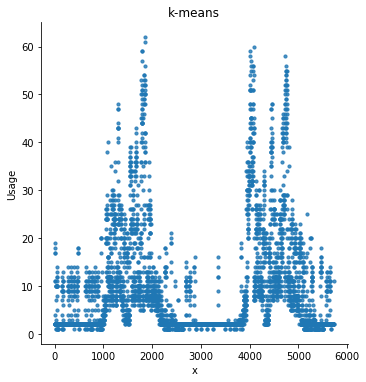

In [184]:
sb.lmplot('x','Usage',data=df,fit_reg=False, scatter_kws={"s":10})
plt.title('k-means')


In [185]:
points = df.values
kmeans = KMeans(n_clusters=100).fit(points)

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


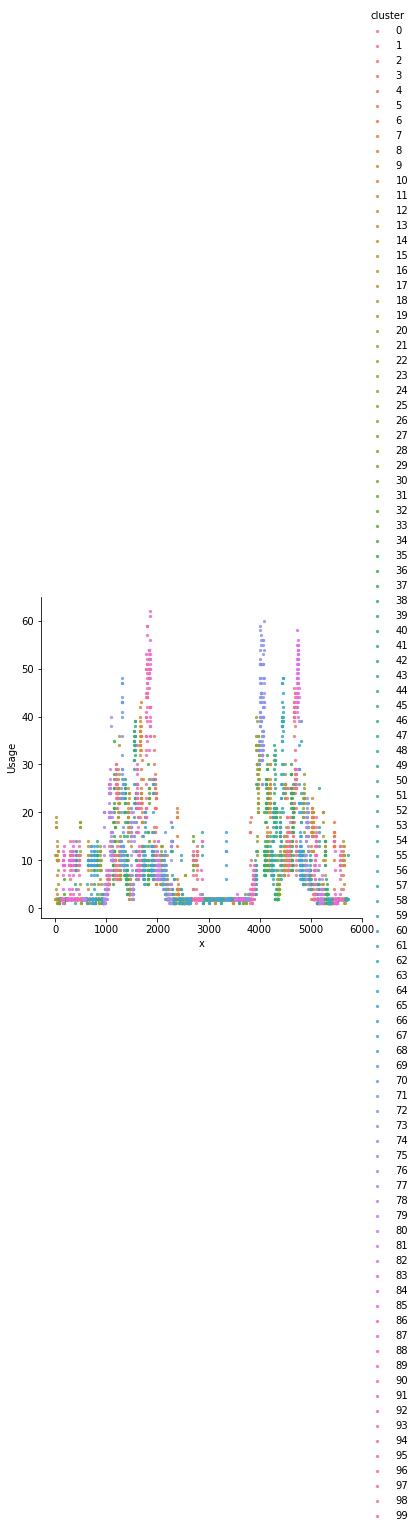

In [186]:
df['cluster'] = kmeans.labels_
sb.lmplot('x','Usage',data=df,fit_reg=False,scatter_kws={"s":5}, hue ="cluster")


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'k-means')

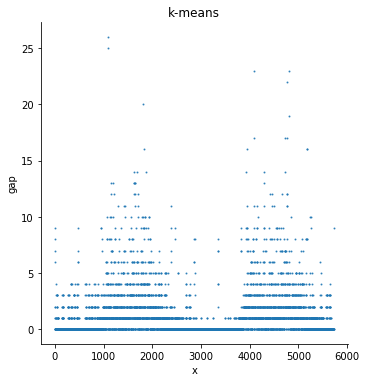

In [187]:
sb.lmplot('x','gap',data=gap_df,fit_reg=False, scatter_kws={"s":1})
plt.title('k-means')

In [188]:
points_gap = gap_df.values
kmeans_gap = KMeans(n_clusters=30).fit(points_gap)
kmeans_gap.cluster_centers_


array([[7.13000000e+02, 5.94470046e-01],
       [3.63700000e+03, 5.18134715e-02],
       [5.32350000e+03, 7.64044944e-01],
       [2.23550000e+03, 1.11052632e+00],
       [4.34900000e+03, 2.20111732e+00],
       [1.69750000e+03, 2.86206897e+00],
       [2.83250000e+03, 3.82352941e-01],
       [2.92000000e+02, 3.78109453e-01],
       [4.73200000e+03, 3.14285714e+00],
       [1.33500000e+03, 2.00523560e+00],
       [4.93650000e+03, 1.67475728e+00],
       [3.03650000e+03, 1.96078431e-02],
       [3.82450000e+03, 7.69230769e-01],
       [9.28500000e+02, 8.41121495e-01],
       [5.64900000e+03, 4.96688742e-01],
       [4.98500000e+02, 4.24528302e-01],
       [2.42900000e+03, 6.19289340e-01],
       [3.24000000e+03, 9.85221675e-03],
       [2.05000000e+03, 1.48066298e+00],
       [4.53450000e+03, 2.05729167e+00],
       [1.13750000e+03, 2.71078431e+00],
       [5.13700000e+03, 1.39487179e+00],
       [1.52050000e+03, 2.13888889e+00],
       [4.17400000e+03, 1.95321637e+00],
       [9.550000

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


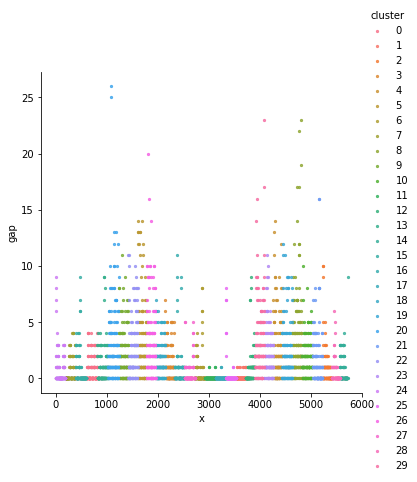

In [189]:
gap_df['cluster'] = kmeans_gap.labels_
sb.lmplot('x','gap',data=gap_df,fit_reg=False,scatter_kws={"s":5}, hue ="cluster")


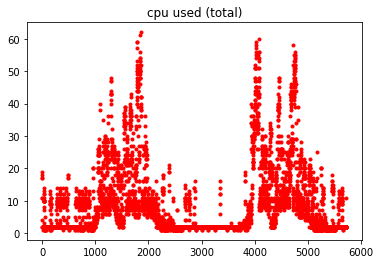

In [190]:
import matplotlib.pyplot as plt
x_array =list(np.arange(0,len(indexing1_df),1))
plt.plot(x_array, indexing1_df.사용율,'r.')
plt.title('cpu used (total)')
plt.show()

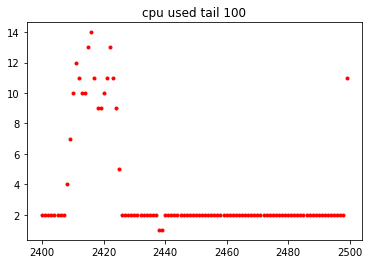

In [191]:
import matplotlib.pyplot as plt
x_array =list(np.arange(2400,2500,1))
plt.plot(x_array, indexing1_df.사용율.tail(100),'r.')
plt.title('cpu used tail 100')
plt.show()

In [192]:
into_divider=indexing2_df.values
cpu1_ = [i,into_divider.ravel()]
